Everything in this notebook is my work for the fifth exercise of the AML course.

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Bank Marketing Dataset

(1) Load the data

In [185]:
bank_data = pd.read_csv("bank/bank.csv", delimiter=";")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


(2) Convert non-numeric values to numeric

In [186]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Some of the columns contain non-numeric values that should be transformed

In [187]:
unique_jobs = bank_data['job'].unique()
print("Number of unique jobs:", len(unique_jobs))

Number of unique jobs: 12


Since most of the elements in the columns aren't unique, I decided just to encode them and not to produce unnecessary overhead by adding one-hot encoding.

The column "pdays" contains values that may cause problems (i.e. the value -1). I create a new column named "previously_contacted" and replace the -1 values with zero, so we can still distinguish, which people were contacted and also have no negative values.

In [188]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for feature in categorical_features:
    bank_data[feature] = pd.Categorical(bank_data[feature]).codes

bank_data['previously_contacted'] = np.where(bank_data['pdays'] != -1, 1, 0)

bank_data['pdays'] = bank_data['pdays'].replace(-1, 0)

bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,previously_contacted
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,0,0,3,0,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0,1
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0,1
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,0,0,3,0,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,0,0,3,0,0


(3) Remove null / NaN values

In [189]:
bank_data.isnull().sum()

age                     0
job                     0
marital                 0
education               0
default                 0
balance                 0
housing                 0
loan                    0
contact                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
y                       0
previously_contacted    0
dtype: int64

No column contains missing values, so we have nothing to remove.

(4) Split the data, standartize the data and add bias 

In [190]:
np.random.seed(1337)

def split_data(Xdata, Ydata, train_percent):
    split_index = int(train_percent * len(Xdata))

    indices = np.arange(len(Xdata))
    np.random.shuffle(indices)

    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    Xtrain = Xdata.iloc[train_indices].reset_index(drop=True)
    Ytrain = Ydata.iloc[train_indices].reset_index(drop=True)
    Xtest = Xdata.iloc[test_indices].reset_index(drop=True)
    Ytest = Ydata.iloc[test_indices].reset_index(drop=True)
    
    return Xtrain, Ytrain, Xtest, Ytest

# mean and standard deviation are parameters that are learned from the training set
def standardize_data(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train_standardized = (X_train - mean) / std
    X_test_standardized = (X_test - mean) / std
    return X_train_standardized, X_test_standardized

bank_Xdata = bank_data.drop(['y'], axis=1)
bank_Ydata = bank_data['y']

bank_Xtrain, bank_Ytrain, bank_Xtest, bank_Ytest = split_data(bank_Xdata, bank_Ydata, 0.8)

bank_Xtrain, bank_Xtest = standardize_data(bank_Xtrain, bank_Xtest)

bank_Ytrain = bank_Ytrain.values
bank_Ytest = bank_Ytest.values

N = bank_Xtrain.shape[0]
bank_Xtrain = np.c_[np.ones(N), bank_Xtrain]
N = bank_Xtest.shape[0]
bank_Xtest = np.c_[np.ones(N), bank_Xtest]

Wine quality dataset

In [191]:
red_wine_data = pd.read_csv("wine_quality_data/winequality-red.csv", sep=';')
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1) Convert the non-numeric values to numeric

In [192]:
red_wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

After checking if there are any non-numeric values, we can conclude that we don't have and we don't have anything to transform.

(2) Handle sparse data / missing values

In [193]:
red_wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The red wine dataset has no missing data. We don't have to handle anything.

(3) Split the data, normalize and add bias

In [ ]:
red_wine_Xdata = red_wine_data.drop(columns=['quality'])
red_wine_Ydata = red_wine_data['quality']

red_wine_Xtrain, red_wine_Ytrain, red_wine_Xtest, red_wine_Ytest = split_data(red_wine_Xdata, red_wine_Ydata, 0.8)

red_wine_Xtrain, red_wine_Xtest = standardize_data(red_wine_Xtrain, red_wine_Xtest)

N = red_wine_Xtrain.shape[0]
red_wine_Xtrain = np.c_[np.ones(N), red_wine_Xtrain]
N = red_wine_Xtest.shape[0]
red_wine_Xtest = np.c_[np.ones(N), red_wine_Xtest]

red_wine_Ytrain = red_wine_Ytrain.values
red_wine_Ytest = red_wine_Ytest.values

# Implementation of the Mini-batch Linear Ridge Regression

Here, I use the precomputed gradient descent because of the performance. I normalize it by the size of the batch, because of the numerical properties it has. It stablizes the magnitude of the gradients and makes the solution less sensitive to the value of the learning rate.

Here is the cost function of the Ridge Linear Regression:

$$E(\mathbf{w}) = \frac{1}{2m} \sum_{i=1}^m(\hat{y}_{i} - \bold{x}_{i}\bold{w})^2 + \frac{\lambda}{2} ||\bold{w}||^2$$

Here is it's first derivative:

$$
\frac{\partial E(\mathbf{w})}{\partial \mathbf{w}} = -\frac{1}{m} \sum_{i=1}^m \left( \hat{y}_{i} - \mathbf{x}_{i} \mathbf{w} \right) \mathbf{x}_{i} + \lambda \mathbf{w}
$$

or also:

$$
\frac{\partial E(\mathbf{w})}{\partial \mathbf{w}} = \frac{1}{m} \mathbf{X}^\top (\mathbf{X} \mathbf{w} - \mathbf{\hat{y}}) + \lambda \mathbf{w}
$$


For logistic ridge regression the first derivative is very similar. The difference is that the target is either 0 or 1 and the prediction is made through $\sigma(\bold{X}\bold{w})$.


RMSE:  0.6785235482839505


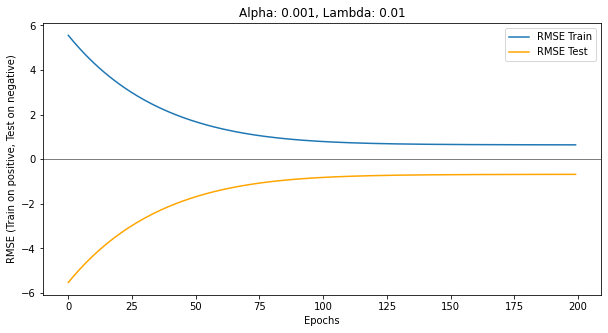

RMSE:  0.8555376040714784


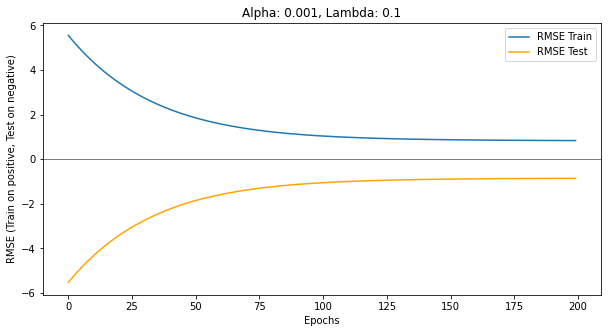

RMSE:  2.911283158367461


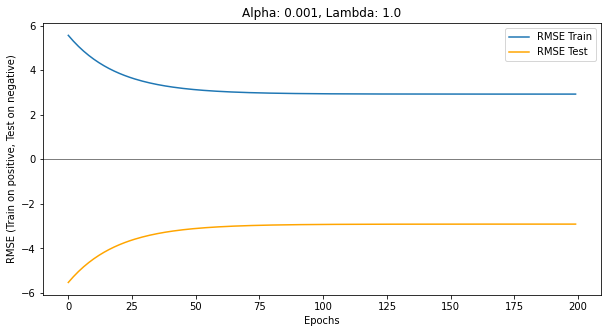

RMSE:  0.6749617379662656


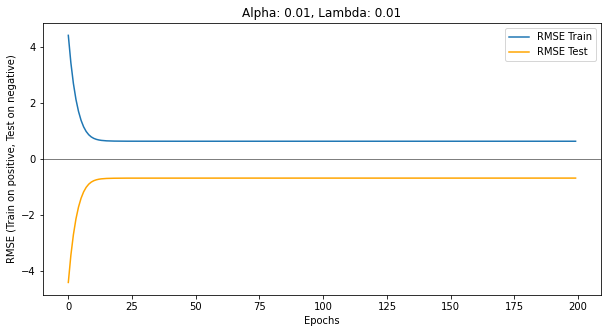

RMSE:  0.8448017583810418


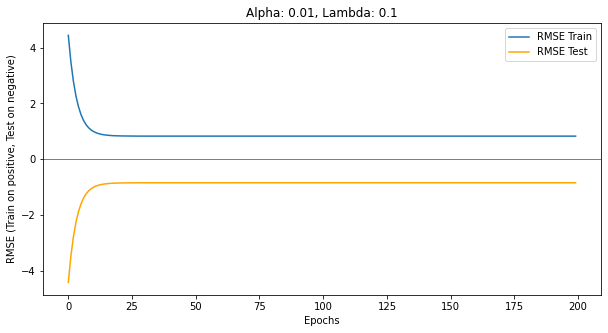

RMSE:  2.914454709097331


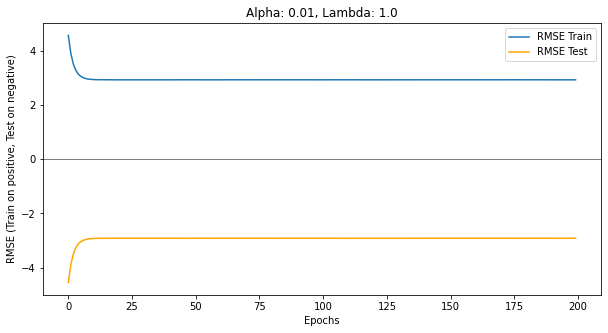

RMSE:  0.6790700119864146


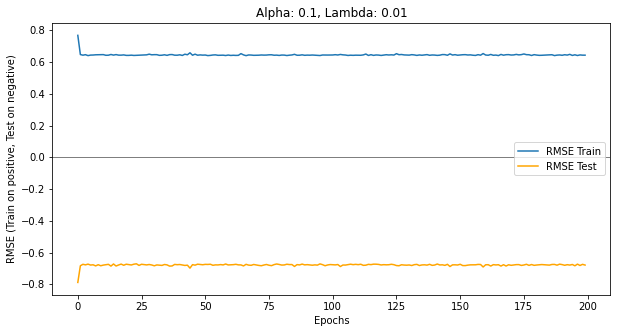

RMSE:  0.8531366492061943


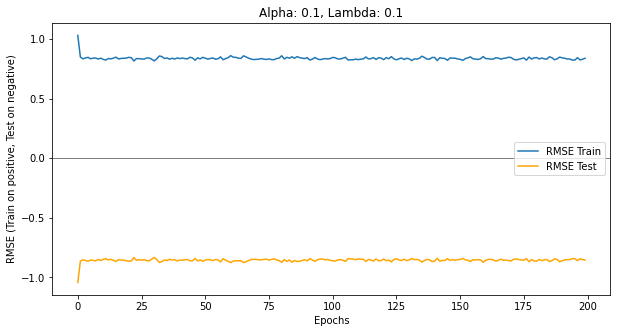

RMSE:  2.9969939853693917


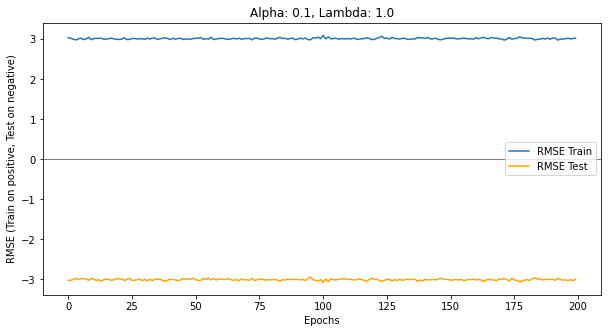

In [195]:
from scipy.special import expit as sigmoid

def predict(X, weights):
    return X @ weights

def compute_rmse(y_true, y_pred):
    error = y_true - y_pred
    return np.sqrt(np.mean(error ** 2))

def mini_batch_ridge_regression(X_train, y_train, X_test, y_test, alpha, lambda_val, batch_size, epochs):
    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)
    rmse_train = []
    rmse_test = []

    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X_shuffled = X_train[indices]
        y_shuffled = y_train[indices]
        
        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_pred = predict(X_batch, weights)
            error = y_pred - y_batch
            gradient = X_batch.T.dot(error) / batch_size + lambda_val * weights
            
            weights -= alpha * gradient

        rmse_train.append(compute_rmse(y_train, predict(X_train, weights)))
        rmse_test.append(compute_rmse(y_test, predict(X_test, weights)))
        
    return weights, rmse_train, rmse_test

alpha_values = [0.001, 0.01, 0.1]    
lambda_values = [0.01, 0.1, 1.0]   
batch_size = 50
epochs = 200

for alpha in alpha_values:
    for lambda_val in lambda_values:
        weights, rmse_train, rmse_test = mini_batch_ridge_regression(
            red_wine_Xtrain, red_wine_Ytrain, red_wine_Xtest, red_wine_Ytest, alpha, lambda_val, batch_size, epochs
        )
        print("RMSE: ",rmse_test[-1])
        plt.figure(figsize=(10, 5))
        plt.plot(range(epochs), rmse_train, label='RMSE Train')
        plt.plot(range(epochs), [-x for x in rmse_test], label='RMSE Test', color='orange')
        plt.axhline(0, color='black', lw=0.5)
        plt.xlabel('Epochs')
        plt.ylabel('RMSE (Train on positive, Test on negative)')
        plt.title(f'Alpha: {alpha}, Lambda: {lambda_val}')
        plt.legend()
        plt.show()

In [196]:
def predict_class(X, weights):
    return sigmoid(X @ weights)

def compute_cross_entropy(y_true, y_pred):
    epsilon = 1e-10 
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def mini_batch_logistic_regression(X_train, y_train, X_test, y_test, alpha, lambda_val, batch_size, epochs):
    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)
    cross_entropy_train = []
    cross_entropy_test = []

    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        X_shuffled = X_train[indices]
        y_shuffled = y_train[indices]

        for i in range(0, n_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_pred = predict_class(X_batch, weights)
            error = y_pred - y_batch
            gradient = X_batch.T.dot(error) / batch_size + lambda_val * weights

            weights -= alpha * gradient

        cross_entropy_train.append(compute_cross_entropy(y_train, predict_class(X_train, weights)))
        cross_entropy_test.append(compute_cross_entropy(y_test, predict_class(X_test, weights)))

    return weights, cross_entropy_train, cross_entropy_test

alpha_values = [0.001, 0.01, 0.1]
lambda_values = [0.01, 0.1, 1.0]
batch_size = 50
epochs = 300

for alpha in alpha_values:
    for lambda_val in lambda_values:
        weights, cross_entropy_train, cross_entropy_test = mini_batch_logistic_regression(
          bank_Xtrain, bank_Ytrain, bank_Xtest, bank_Ytest, alpha, lambda_val, batch_size, epochs
        )
        print("Cross-Entropy Loss (Test):", cross_entropy_test[-1])
      
        plt.figure(figsize=(10, 5))
        plt.plot(range(epochs), cross_entropy_train, label='Cross-Entropy Train')
        plt.plot(range(epochs), [-x for x in cross_entropy_test], label='Cross-Entropy Test', color='orange')
        plt.axhline(0, color='black', lw=0.5)
        plt.xlabel('Epochs')
        plt.ylabel('Cross-Entropy Loss (Train on positive, Test on negative)')
        plt.title(f'Alpha: {alpha}, Lambda: {lambda_val}')
        plt.legend()
        plt.show()

KeyboardInterrupt: 

#### **Analysis of the results**

I tried different epoch sizes and found that convergence is reached after 200-300 epochs. Adding L2 regularization specifies how much the size of the weights matters, which helps prevent overfitting. The plots above illustrate how different values of $\alpha$ and $\lambda$ interact. A higher $\lambda$ means that the size of the weights matters more. It in combination with the squared values of the weights makes a boundary the loss function is trying to pass through, but it can't due to the regularization. The highest $\alpha$ values (e.g., 0.1) also introduce instability, causing oscillations around the minimum. If I hadn’t divided the gradient by the batch size, this instability would have been much more significant (we see that the last two plots for the two models aren't very smooth) and would likely have led to divergence.

The mini-batch gradient descent used above shows it benefits. It combines both batch gradient descent and stochastic gradient descent (SGD). It produces solution that returns relatively constant values (as we can see the plots are a lot smoother than just using SGD like in the last exercise) and can work with large datasets efficiently. 

I decided to plot Cross-Entropy Loss of the Logistic Ridge Regression, because RMSE isn't very appropriate.



# Hyperparameter tuning using K-Fold-Cross-Validation and Grid Search

In [ ]:
def manual_k_fold_cross_validation(X, y, k):
    n_samples = len(y)
    fold_size = n_samples // k
    folds = []

    for i in range(k):
        val_start = i * fold_size
        val_end = val_start + fold_size if i < k - 1 else n_samples
        X_val, y_val = X[val_start:val_end], y[val_start:val_end]
        X_train = np.vstack((X[:val_start], X[val_end:])) # Should be matrix
        y_train = np.concatenate((y[:val_start], y[val_end:])) # Should be vector
        folds.append((X_train, y_train, X_val, y_val))

    return folds

def grid_search_ridge_cv(X, y, alpha_values, lambda_values, batch_size, epochs, k=5):
    results = []

    folds = manual_k_fold_cross_validation(X, y, k)

    for alpha in alpha_values:
        for lambda_val in lambda_values:
            rmse_scores = []

            for X_train, y_train, X_val, y_val in folds:
                _, rmse_train, rmse_val = mini_batch_ridge_regression(
                     X_train, y_train, X_val, y_val, alpha, lambda_val, batch_size, epochs
                )
                rmse_scores.append(rmse_val[-1])
                
            mean_rmse = np.mean(rmse_scores)
            results.append((alpha, lambda_val, mean_rmse))
    return results

# alpha_values = [0.001, 0.01, 0.1]
# lambda_values = [0.01, 0.1, 1.0]
alpha_values = np.logspace(-3, -1, num=10)
lambda_values = np.logspace(-2, 0, num=10)

print("All alpha values:", alpha_values)
print("All lambda values:", lambda_values)

batch_size = 50
epochs = 200

results = grid_search_ridge_cv(red_wine_Xtrain, red_wine_Ytrain, alpha_values, lambda_values, batch_size, epochs)

best_alpha, best_lambda, best_rmse = min(results, key=lambda x: x[2])
print(f"Best alpha: {best_alpha}, Best lambda: {best_lambda}, with RMSE: {best_rmse}")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

alphas = [res[0] for res in results]
lambdas = [res[1] for res in results]
rmses = [res[2] for res in results]

ax.scatter(alphas, lambdas, rmses, c=rmses, cmap='viridis')
ax.set_xlabel('Alpha (Learning Rate)')
ax.set_ylabel('Lambda (Regularization)')
ax.set_zlabel('Mean RMSE from all folds')
ax.set_title('Grid Search Results: Alpha vs Lambda vs Mean RMSE')
plt.show()

final_weights, final_rmse_train, final_rmse_test = mini_batch_ridge_regression(
    red_wine_Xtrain, red_wine_Ytrain, red_wine_Xtest, red_wine_Ytest, best_alpha, best_lambda, batch_size, epochs
)

print("Final RMSE on the test set:", final_rmse_test[-1])

plt.figure(figsize=(10, 5))
plt.plot(range(epochs), final_rmse_train, label='RMSE Train')
plt.plot(range(epochs), [-x for x in final_rmse_test], label='RMSE Test', color='orange')
plt.axhline(0, color='black', lw=0.5)
plt.xlabel('Epochs')
plt.ylabel('RMSE (Train on positive, Test on negative)')
plt.title(f'Optimal Alpha: {best_alpha}, Optimal Lambda: {best_lambda}')
plt.legend()
plt.show()

All alpha values: [0.001      0.0016681  0.00278256 0.00464159 0.00774264 0.0129155
 0.02154435 0.03593814 0.05994843 0.1       ]
All lambda values: [0.01       0.01668101 0.02782559 0.04641589 0.07742637 0.12915497
 0.21544347 0.35938137 0.59948425 1.        ]


KeyboardInterrupt: 

#### **Analysis of the result**

Looking at the 3D plot, we can see that normalizing the gradient by dividing it through the batch size makes the solution less sensitive to the learning rate. The only strong correlation we observe is between $\lambda$ and RMSE, where increasing $\lambda$ (within the range of [0.01, 0.1]) results in a higher RMSE. The parameters that produce the smallest learning rate are identified, and the corresponding RMSE is achieved (as shown above). For this case, smallest $\lambda$ means lowest RMSE. We see that the best learning rate for the Red Wine Quality dataset is between 0.01 and 0.1. This can also be observed on the plots in the first exercise. For $\alpha$ = 0.001 the plot is smooth, but convergence is reached in more epochs. For $\alpha$ = 0.01, we see that the plot is still smooth, yet the convergence is faster. When we increase the $\alpha$ to 0.1, the smoothness of the plot is lost, that's why I conclude that the learning rate should be above 0.01, but less than 0.1.

The plots of the first task show that for $\alpha$ = 0.001 and $\lambda$ = 0.1 we achieve better results than in the second task for the same parameter. This is because K-Fold Cross Validation and the Grid Search operate only on the training data and only at the end see the test data, so the decision here is fully based on the training set. 

**Note**: In my opinion, the Wine Quality dataset isn't good for linear regression since the target can only have 10 possible value. Better option, which would lead to more accurate result, would be Multiple Logistic Regression with 10 classes. 

In [202]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()

ridge_model.fit(red_wine_Xtrain, red_wine_Ytrain)

y_pred_ridge = ridge_model.predict(red_wine_Xtest)

rmse_ridge = compute_rmse(red_wine_Ytest, y_pred_ridge)

print("Ridge Regression Results:")
print(f"RMSE: {rmse_ridge}")

Ridge Regression Results:
RMSE: 0.6739903392682299


Through the Linear Regression with Grid Search and K-Fold Cross Validation we reach a very similar RMSE to the RMSE of the *sklearn*'s class Ridge. The difference here is that *sklearn* uses closed-form solution. Gradient descent methods approximate the solution of the closed-form method.